In [34]:
 #|default_exp app

# Imports

In [26]:
#|export
import PIL
import gradio as gr
from fastai.vision.all import *
import librosa
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os

# Load Model

In [20]:
#|export
learn = load_learner('./model.pkl')

# Logic

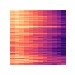

In [29]:
#|export
def create_spectogram(path):
    samples, sample_rate = librosa.load(path, duration=5.0)
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
    return S

def spectogram_to_image(spec):
    fig = plt.figure(figsize=[0.72, 0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    librosa.display.specshow(librosa.power_to_db(spec, ref=np.max))
    fig.canvas.draw()
    return PIL.Image.frombytes('RGB',fig.canvas.get_width_height(),fig.canvas.tostring_rgb())

def predict(audio_file_path):
    spec = create_spectogram(audio_file_path)
    spec_image = spectogram_to_image(spec)
    prediction,other,probs = learn.predict(spec_image)
    return prediction

# UI

In [30]:
#|export
iface = gr.Interface(fn=predict, inputs=[
                     gr.components.Audio(type='filepath')], outputs="text")
iface.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


/Users/gabriel/Code/python/drum-sample-categorization/.venv/lib/python3.9/site-packages/gradio/processing_utils.py:180: UserWarning: Trying to convert audio automatically from int32 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))
/Users/gabriel/Code/python/drum-sample-categorization/.venv/lib/python3.9/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1247
  warnings.warn(


In [35]:
import nbdev
nbdev.export.nb_export('drum_sample_categorization.ipynb', './')
